# Analysis of Wall practice

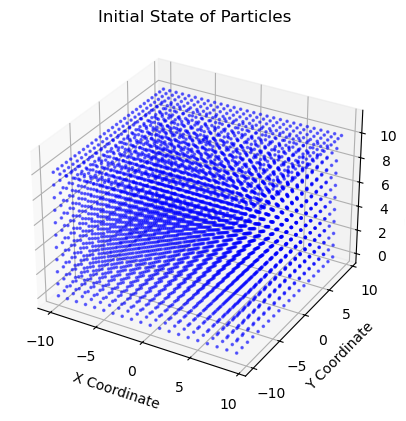

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Read the simulation data from the file
def read_simulation_data(file_path):
    data = []
    # Each line in the file corresponds to a set of coordinates for a particle for an specific time frame
    # (3 position coordinates and other optional features)
    # Each time frame is separated by an empty newline
    # The result should be an array (N, a, T) where N is the number of particles, a is the number of features (3 for position + 3 for velocity, etc.), and T is the number of time frames
    with open(file_path, 'r') as file:
        current_frame = []
        for line in file:
            line = line.strip()
            if line:  # Non-empty line
                coords = list(map(float, line.split()))
                current_frame.append(coords)
            else:  # Empty line indicates end of a frame
                if current_frame:
                    data.append(current_frame)
                    current_frame = []
        if current_frame:  # Add the last frame if it exists
            data.append(current_frame)
    # Convert to numpy array
    return np.array(data)

def plot_initial_state(data):
    # Assuming the first frame is the initial state
    initial_state = data[0]
    # Extract x, y, z coordinates
    x = initial_state[:, 0]
    y = initial_state[:, 1]
    z = initial_state[:, 2]
    radii = initial_state[:, 3] if initial_state.shape[1] > 3 else np.ones_like(x)*0.5  # Use a default radius of 0.5 if not provided

    # Create a 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, s=radii*5, c='b', alpha=0.5)  # Scale radius for visibility

    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_zlabel('Z Coordinate')
    ax.set_title('Initial State of Particles')

    plt.show()


data = read_simulation_data("traj.txt")

# Make a plot of the initial state using all the data array
plot_initial_state (data)

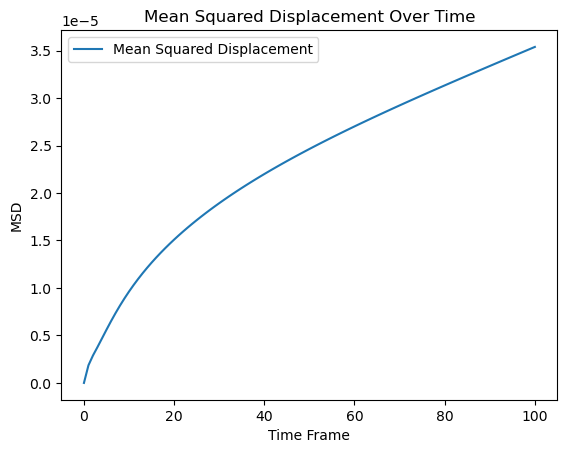

In [11]:
# Obtain the mean squared displacement (MSD) evolution over time as a mean over all the tracers
def calculate_msd(data):
    # Obtain the particles' positions over time
    num_frames = data.shape[0]
    num_particles = data.shape[1]

    # Initialize MSD array
    msd = np.zeros(num_frames)
    # Loop over time frames
    for t in range(num_frames):
        # Calculate the squared displacement for each particle
        squared_displacements = np.sum((data[t,:,:3] - data[0,:,:3])**2, axis=1)
        # Calculate the mean squared displacement
        msd[t] = np.mean(squared_displacements)
    return msd

def plot_msd(msd):
    plt.figure()
    plt.plot(msd, label='Mean Squared Displacement')
    plt.xlabel('Time Frame')
    plt.ylabel('MSD')
    plt.title('Mean Squared Displacement Over Time')
    plt.legend()
    plt.show()

    
# Calculate MSD
msd = calculate_msd(data)
# Plot MSD over time
plot_msd(msd)